# Which Evaluation Metric Should You Use in Machine Learning Regression Problems?
## R-Squared, RMSE, and MAE
## By Jeff Hale
## Discussed in this article TK

In [23]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

## Data

In [24]:
y_true = np.array([1.1, 2.2, 3.3])
y_pred = np.array([1., 3, 3.1])

In [35]:
tracking_df = pd.DataFrame(data=np.transpose([y_true, y_pred]),  columns=['y_true', 'y_pred'])
tracking_df

,y_true,y_pred
0,1.1,1.0
1,2.2,3.0
2,3.3,3.1


## R2

#### First, we'll use the scikit-learn function.

In [45]:
r2_score(y_true, y_pred)

0.7148760330578514

#### Now let's break the code apart from the scikit-learn source code

numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,dtype=np.float64)
                                                      
                                                      
denominator = (weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2).sum(axis=0, dtype=np.float64)

Let's take out the weighting to make it easier to see.

In [46]:
numerator = ((y_true - y_pred) ** 2).sum()
denominator = ((y_true - np.average(y_true)) ** 2).sum()

In [47]:
r2 = 1 - (numerator/denominator)
r2

0.7148760330578514

You can get a big negative R2 score

In [48]:
r2_score([55, 2, 3], [1, 2, 1])

-0.588683351468988

Horizontal line prediction of the mean results in an R2 score of 0.

In [63]:
np.mean([55, 2, 3])

20.0

In [64]:
r2_score([55, 2, 3], [20, 20, 20])

0.0

### Adding more columns to the tracking DataFrame to be explicit if folks want to see intermediate steps.

In [59]:
tracking_df['Errors'] = y_true - y_pred
tracking_df

,y_true,y_pred,Errors
0,1.1,1.0,0.1
1,2.2,3.0,-0.8
2,3.3,3.1,0.2


In [61]:
tracking_df['Errors Squared'] = tracking_df['Errors'] ** 2
tracking_df

,y_true,y_pred,Errors,Errors Squared
0,1.1,1.0,0.1,0.01
1,2.2,3.0,-0.8,0.64
2,3.3,3.1,0.2,0.04


In [62]:
tracking_df['y_mean'] = tracking_df['y_true'].mean()
tracking_df

,y_true,y_pred,Errors,Errors Squared,y_mean
0,1.1,1.0,0.1,0.01,2.2
1,2.2,3.0,-0.8,0.64,2.2
2,3.3,3.1,0.2,0.04,2.2


## Adjusted R2
Accounts for number of predictors

In [65]:
n = len(tracking_df)
n

3

Assume 5 feature variables were used.

In [66]:
p = 5

In [68]:
adjusted_r2 = 1 - (1 - r2) * (n - 1) / ( n - p - 1)
adjusted_r2

# adapted from https://stackoverflow.com/a/51038943/4590385

1.190082644628099

## RMSE

Root mean squared error. 

#### RMSE function

In [50]:
mean_squared_error(y_true, y_pred, squared=False)

0.4795831523312718

Take apart the scikit-learn code

In [52]:
np.sqrt(np.average((y_true - y_pred) ** 2))

0.4795831523312718

Alternative, if you have the R2 and standard deviation of *y* you can get the RMSE like this.

In [40]:
np.sqrt(1-r2) * np.std(y_true)

0.4795831523312718

Start with the variance not explained by the model. Take the square root of that. Multiply it by the Standard Deviation and you have the root of the mean squared error.

## MAE
Mean absolute error.

In [56]:
mean_absolute_error(y_true, y_pred)

0.36666666666666653

In [57]:
np.average(np.abs(y_true - y_pred))

0.36666666666666653

## Visualization

In [88]:
import matplotlib.pyplot as plt

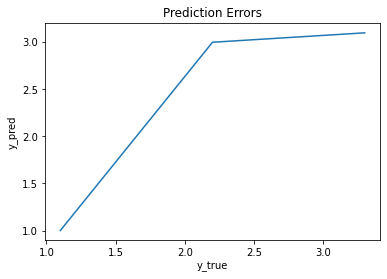

In [91]:
plot = tracking_df.plot("y_true", "y_pred", legend=False, title='Prediction Errors');
plt.ylabel('y_pred')
plot;

In [92]:
pd.options.plotting.backend = "plotly"

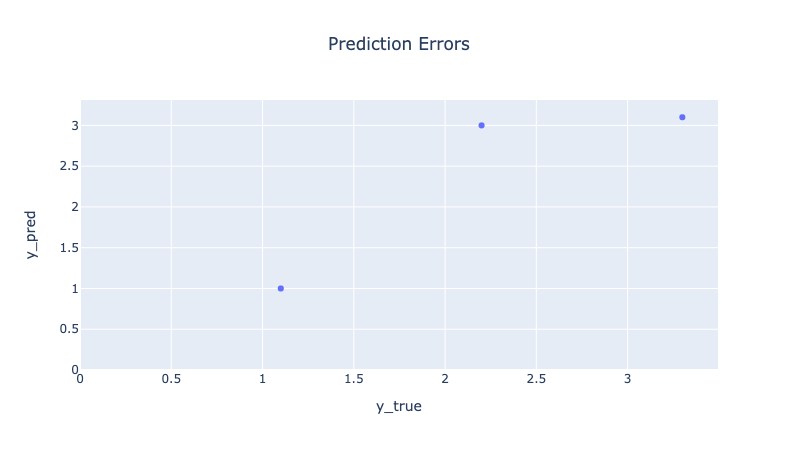

In [109]:
fig = tracking_df.plot.scatter("y_true", "y_pred", title='Prediction Errors')
fig.update_layout(title_x=0.5)
fig.update_yaxes(rangemode="tozero")
fig.update_xaxes(rangemode="tozero")
fig.show();